#Importing relevant Libraries

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Loading Dataset

In [0]:
PATH = '/content/drive/My Drive/Colab Notebooks/Capstone Project/'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
plantDf = pd.read_csv(PATH+'Data/capstone_train.csv')
plantDfOriginal = plantDf.copy()

In [0]:
plantDf.shape

(464809, 13)

#Data Analysis

In [0]:
plantDf.sample(10)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
403362,3111,339,26,335,130,228,154,192.0,171,1449,24,3,Ascomoid
308373,3000,100,11,153,45,959,238,NaN,116,362,32,3,Assassin vine
443298,3031,39,20,285,26,4489,216,191.0,103,799,29,1,Assassin vine
56058,3073,113,22,95,32,1121,251,212.0,77,1475,24,3,Assassin vine
308076,2275,305,23,134,45,1530,151,NaN,207,713,6,4,Kelpie
132275,3249,286,12,400,124,1187,185,239.0,194,2058,29,1,Assassin vine
205316,3193,274,10,309,-6,3059,194,243.0,188,108,32,3,Assassin vine
55154,2955,99,10,182,36,4775,236,227.0,121,5693,12,1,Assassin vine
384046,3197,113,18,335,49,764,248,218.0,92,2787,23,2,Assassin vine
438372,2762,118,11,120,14,2089,240,230.0,118,990,10,3,Assassin vine


In [0]:
plantDf.nunique()

Heigh_From_Sea_Level                 1966
Aspect                                361
Slope                                  66
Distance_To_Water_Source              545
Standing_Distance_To_Water_Source     686
Distance_To_Road                     5744
Shadow_In_Morning                     206
Shadow_In_Midday                      177
Shadow_In_Evening                     255
Distance_To_Fire                     5799
Turf                                   40
Neighbourhood_Type                      4
Plant_Type                              7
dtype: int64

In [0]:
plantDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464809 entries, 0 to 464808
Data columns (total 13 columns):
Heigh_From_Sea_Level                 464809 non-null int64
Aspect                               464809 non-null int64
Slope                                464809 non-null int64
Distance_To_Water_Source             464809 non-null int64
Standing_Distance_To_Water_Source    464809 non-null int64
Distance_To_Road                     464809 non-null int64
Shadow_In_Morning                    464809 non-null int64
Shadow_In_Midday                     371776 non-null float64
Shadow_In_Evening                    464809 non-null int64
Distance_To_Fire                     464809 non-null int64
Turf                                 464809 non-null int64
Neighbourhood_Type                   464809 non-null int64
Plant_Type                           464809 non-null object
dtypes: float64(1), int64(11), object(1)
memory usage: 46.1+ MB


In [0]:
plantDf.describe()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,371776.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2959.483063,155.661235,14.099759,269.290644,46.390412,2351.779462,212.157323,223.311841,142.518338,1980.473990,24.370455,2.113563
std,279.781777,111.919973,7.486816,212.411427,58.240912,1559.868239,26.775574,19.744363,38.273670,1325.289344,9.478907,1.061051
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,20.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,29.000000,2.000000
75%,3163.000000,261.000000,18.000000,384.000000,69.000000,3331.000000,231.000000,237.000000,168.000000,2550.000000,31.000000,3.000000
max,3858.000000,360.000000,65.000000,1390.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,40.000000,4.000000


In [0]:
plantDf.dtypes

Heigh_From_Sea_Level                   int64
Aspect                                 int64
Slope                                  int64
Distance_To_Water_Source               int64
Standing_Distance_To_Water_Source      int64
Distance_To_Road                       int64
Shadow_In_Morning                      int64
Shadow_In_Midday                     float64
Shadow_In_Evening                      int64
Distance_To_Fire                       int64
Turf                                   int64
Neighbourhood_Type                     int64
Plant_Type                            object
dtype: object

In [0]:
plantDf.isna().sum()

Heigh_From_Sea_Level                     0
Aspect                                   0
Slope                                    0
Distance_To_Water_Source                 0
Standing_Distance_To_Water_Source        0
Distance_To_Road                         0
Shadow_In_Morning                        0
Shadow_In_Midday                     93033
Shadow_In_Evening                        0
Distance_To_Fire                         0
Turf                                     0
Neighbourhood_Type                       0
Plant_Type                               0
dtype: int64

#Understanding Target Feature "Plant_Type"

In [0]:
plantDf['Plant_Type'].describe()

count            464809
unique                7
top       Assassin vine
freq             226705
Name: Plant_Type, dtype: object

In [0]:
plant_type_value_counts = plantDf['Plant_Type'].value_counts()
plant_type_value_counts

Assassin vine    226705
Ascomoid         169487
Basidirond        28488
Myconid:          16416
Kelpie            13931
Hangman tree       7598
Dark tree          2184
Name: Plant_Type, dtype: int64

Clearly a case of Class imbalance.

In [0]:
plantDf.columns

Index(['Heigh_From_Sea_Level', 'Aspect', 'Slope', 'Distance_To_Water_Source',
       'Standing_Distance_To_Water_Source', 'Distance_To_Road',
       'Shadow_In_Morning', 'Shadow_In_Midday', 'Shadow_In_Evening',
       'Distance_To_Fire', 'Turf', 'Neighbourhood_Type', 'Plant_Type'],
      dtype='object')

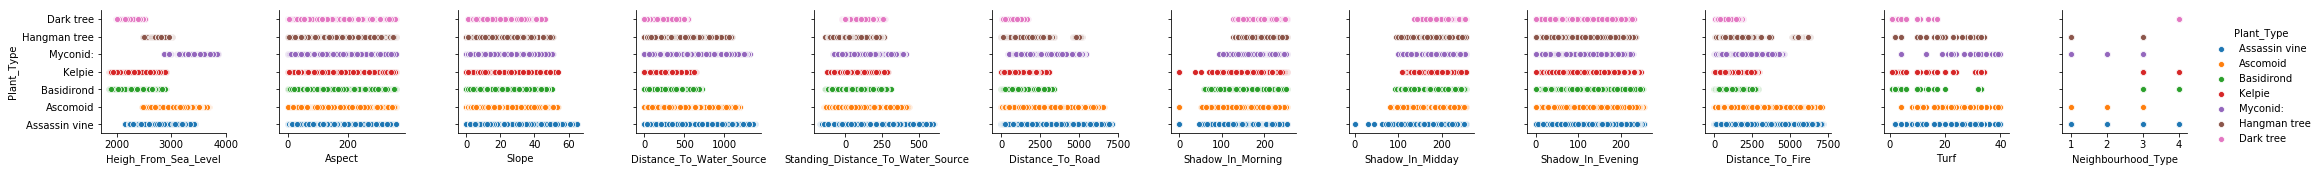

In [0]:
sns.pairplot(plantDf, x_vars = ['Heigh_From_Sea_Level', 'Aspect', 'Slope', 'Distance_To_Water_Source',
       'Standing_Distance_To_Water_Source', 'Distance_To_Road',
       'Shadow_In_Morning', 'Shadow_In_Midday', 'Shadow_In_Evening',
       'Distance_To_Fire', 'Turf', 'Neighbourhood_Type'], y_vars='Plant_Type', hue = 'Plant_Type')

#PairPlots

In [0]:
sns.pairplot(plantDf, hue = 'Plant_Type')

Output hidden; open in https://colab.research.google.com to view.

#Label Encoding on "Plant_Type"

In [0]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
plantDf['Cat_Plant_Type'] = label_encoder.fit_transform(plantDf['Plant_Type'])

In [0]:
plantDf.sample(10)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type,Cat_Plant_Type
414627,2807,222,13,85,19,2065,203,252.0,183,1879,13,3,Assassin vine,1
256422,3433,320,30,942,265,997,131,197.0,198,785,40,2,Ascomoid,0
322737,2630,67,20,360,86,1080,236,196.0,84,1259,30,1,Assassin vine,1
9422,2962,270,8,570,69,5901,199,243.0,183,6259,29,1,Assassin vine,1
261029,3470,49,13,1008,237,2431,225,211.0,117,1318,35,1,Ascomoid,0
120453,2564,81,9,518,61,1142,232,225.0,125,1477,11,3,Assassin vine,1
247358,2550,47,8,408,47,1050,223,NaN,134,1448,11,3,Hangman tree,4
197677,3330,318,6,335,62,3200,204,235.0,169,1806,38,1,Ascomoid,0
211512,2348,81,12,382,155,1008,236,219.0,112,1358,6,4,Dark tree,3
327845,3042,354,2,218,20,2135,215,NaN,157,1243,29,1,Assassin vine,1


In [0]:
plantDf.drop('Plant_Type', axis = 1, inplace = True)

#Treating NaN values in "Shadow_In_Midday" feature.

In [0]:
plantDf['Shadow_In_Midday'].isna().sum()/plantDf.shape[0]

0.20015318119915923

As approximately 20% of data has NaN values, imputing them with mean, median or mode will introduce bias into the data.

##Analyzing "Shadow_In_Midday"

In [0]:
plantDf['Shadow_In_Midday'].describe()

count    371776.000000
mean        223.311841
std          19.744363
min           0.000000
25%         213.000000
50%         226.000000
75%         237.000000
max         254.000000
Name: Shadow_In_Midday, dtype: float64

In [0]:
plantDf['Shadow_In_Midday'].isna().sum()

93033

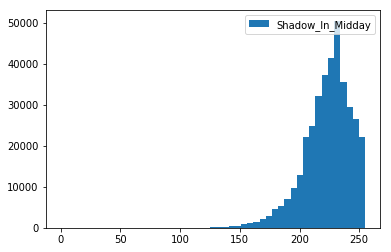

In [0]:
bins = np.linspace(0,255)

plt.hist(plantDf['Shadow_In_Midday'], bins, label = 'Shadow_In_Midday')
plt.legend(loc = 'upper right')
plt.show()

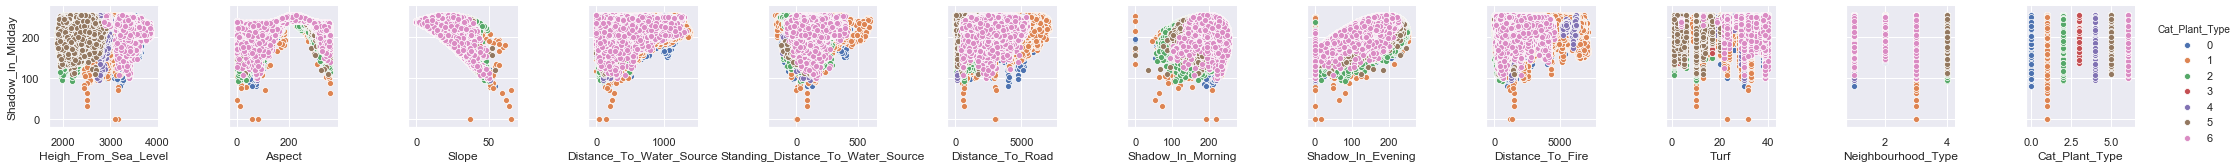

In [0]:
plot = sns.pairplot(plantDf, x_vars = ['Heigh_From_Sea_Level', 'Aspect', 'Slope',
                                       'Distance_To_Water_Source', 
                                       'Standing_Distance_To_Water_Source',
                                       'Distance_To_Road', 'Shadow_In_Morning',
                                       'Shadow_In_Evening', 'Distance_To_Fire',
                                       'Turf', 'Neighbourhood_Type',
                                       'Cat_Plant_Type'],
                    y_vars = 'Shadow_In_Midday', hue = 'Cat_Plant_Type')

##Correlations

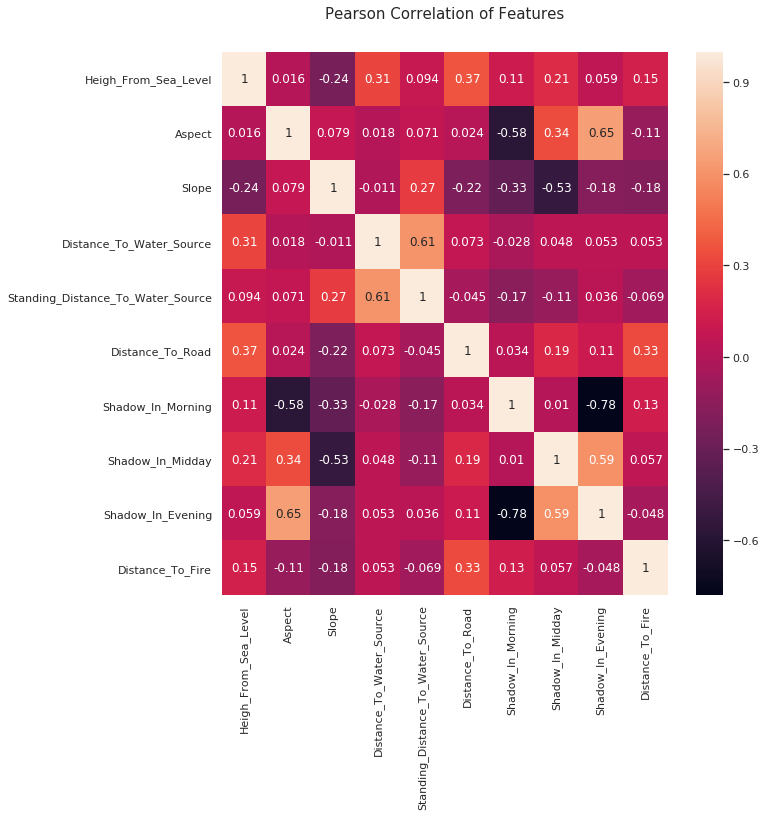

In [0]:
plantDfNum = plantDf.drop(['Turf', 'Neighbourhood_Type', 'Cat_Plant_Type'], axis=1)

sns.set(rc={'figure.figsize':(10,10)})
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(plantDfNum.corr(), annot=True)

Inferences : 
1. "Shadow_In_Midday" has high negative collinearity with  "Slope" (-0.53).
2. "Shadow_In_Midday" has positive collinearity with  "Slope" (0.59).
3. "Shadow_In_Midday" has a low collinearity with "Aspect" (0.34) as compared to "Shadow_In_Morning" and "Shadow_In_Evening", but as "Aspect" is having a high collinearity with "Shadow_In_Morning" and "Shadow_In_Evening" it may contain some information about "Shadow_In_Midday".
4. "Shadow_In_Evening" and Aspect have high positive correlation (0.65).
5. "Shadow_In_Evening" has a high negative correlation with "Shadow_In_Morning"(-0.78).

##Q -> Q Relationship

Between "Shadow_In_Midday" and features having high collinearity with "Shadow_In_Midday"

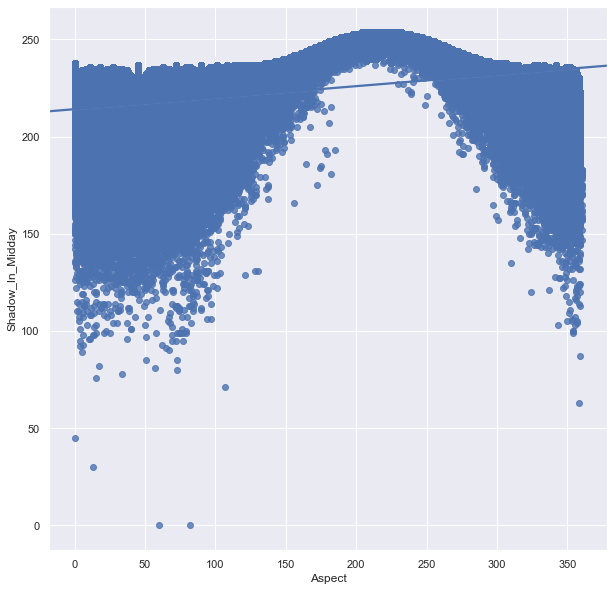

In [0]:
sns.regplot(x = 'Aspect', y= 'Shadow_In_Midday', 
            data = plantDfNum[list(plantDfNum.columns)], ci = 95)

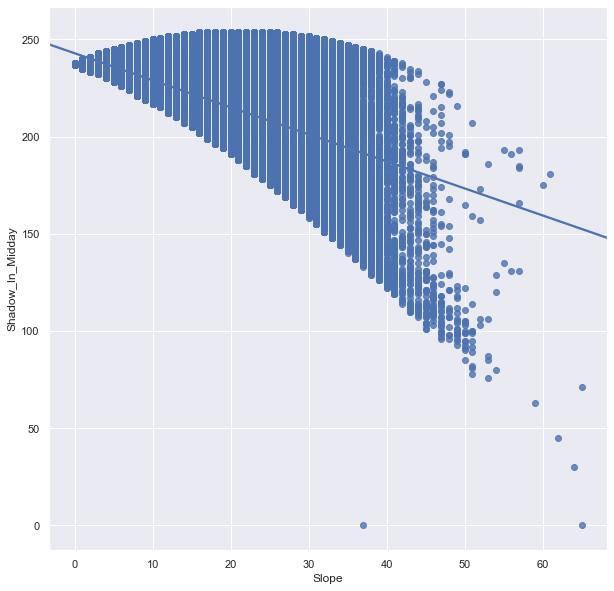

In [0]:
sns.regplot(x = 'Slope', y= 'Shadow_In_Midday', 
            data = plantDfNum[list(plantDfNum.columns)], ci = 95)

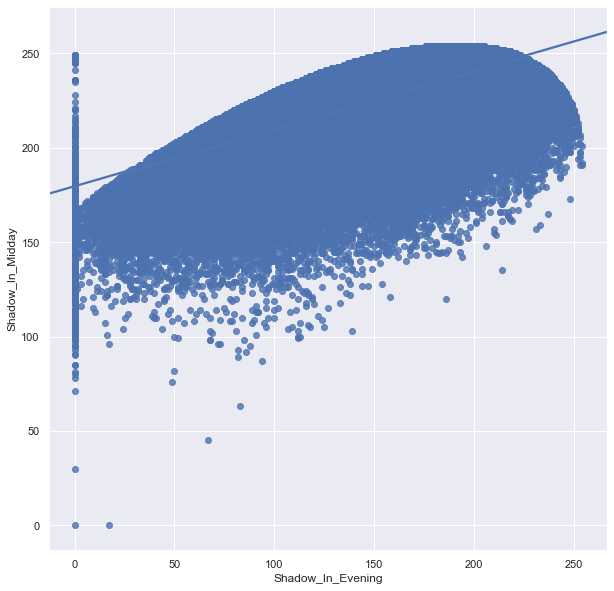

In [0]:
sns.regplot(x = 'Shadow_In_Evening', y= 'Shadow_In_Midday', 
            data = plantDfNum[list(plantDfNum.columns)], ci = 95)

##C->Q Relationship

###Impact of Different Categories on Target

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

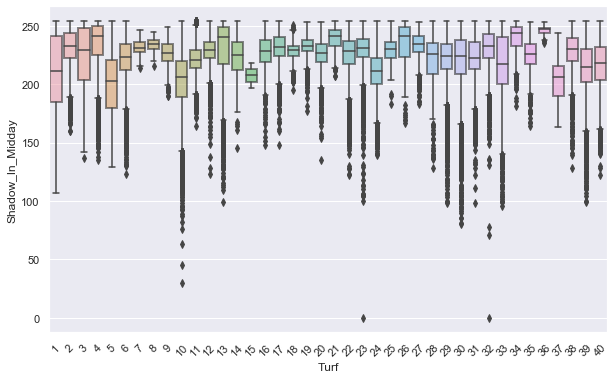

In [0]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Turf', y='Shadow_In_Midday', data=plantDf)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

"Turf" is definitely affecting "Shadow_In_Midday" as for each category of "Turf" their is a high variance in "Shadow_In_Midday" indexes.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

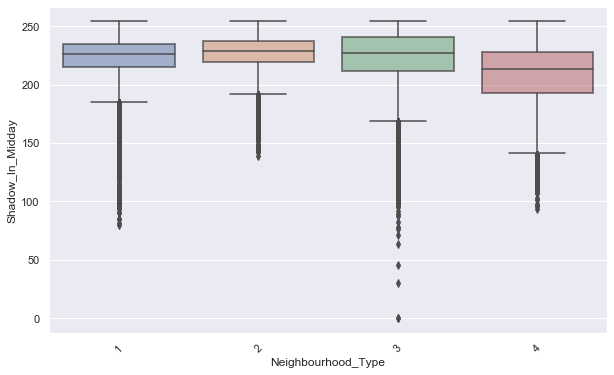

In [0]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Neighbourhood_Type', y='Shadow_In_Midday', data=plantDf)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

It can be seen that plants in 4th Neighbourhood are having lower "Shadow_In_Midday" indexes.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

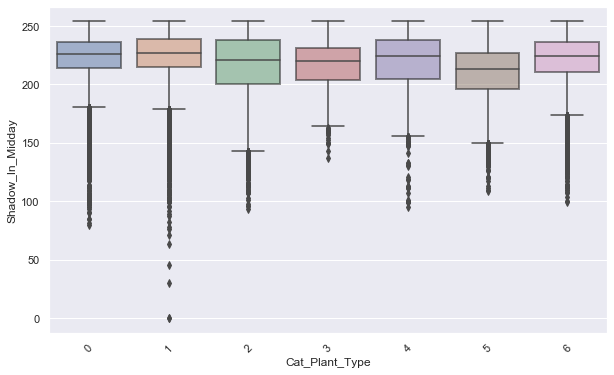

In [0]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Cat_Plant_Type', y='Shadow_In_Midday', data=plantDf)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

"Plant_Type" seems not to have much impact on "Shadow_In_Midday" indexes.

##Imputing "Shadow_In_Midday"

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
plantDfWithoutNan = plantDf[plantDf['Shadow_In_Midday'].notnull()]

In [0]:
plantDfWithoutNan.shape

(371776, 13)

###Using Linear Regression?


In [0]:
from sklearn import linear_model, metrics

####Model 1 : Training Model on all Slope, Shadow_In_Evening and Turf

In [0]:
x = plantDfWithoutNan.filter(items = ['Slope', 'Shadow_In_Evening', 'Turf'])
x = x.values
y = plantDfWithoutNan['Shadow_In_Midday']
y = y.values

In [0]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .2, 
                                                random_state = 5)

In [0]:
reg3feature = linear_model.LinearRegression()

In [0]:
reg3feature.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print('Coefficients: \n', reg3feature.coef_)

Coefficients: 
 [-1.16234257  0.26647936 -0.06517853]


In [0]:
print('Variance score: ', reg3feature.score(xTest, yTest))

Variance score:  0.5353230584301607


In [0]:
yTrainPred = reg3feature.predict(xTrain)
yTestPred = reg3feature.predict(xTest)

In [0]:
print('r2 score on Train: ', metrics.r2_score(yTrain, yTrainPred))
print('r2 score on Test: ', metrics.r2_score(yTest, yTestPred))

r2 score on Train:  0.5387257930895154
r2 score on Test:  0.5353230584301607


####Model 2 : Training Model on all Features

In [0]:
x = plantDfWithoutNan.drop('Shadow_In_Midday', axis = 1)
x = x.values
y = plantDfWithoutNan['Shadow_In_Midday']
y = y.values

In [0]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .2, 
                                                random_state = 5)

In [0]:
reg = linear_model.LinearRegression()

In [0]:
reg.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [ 4.82751959e-04  2.32190579e-03  8.72238507e-01 -4.70828599e-04
  8.29486147e-04  9.03043690e-05  1.18413007e+00  9.78644567e-01
 -6.26169964e-05 -4.39766917e-02 -8.64331724e-02  3.37812565e-02]


In [0]:
print('Variance score: ', reg.score(xTest, yTest))

Variance score:  0.9787326800157982


In [0]:
yTrainPred = reg.predict(xTrain)
yTestPred = reg.predict(xTest)

In [0]:
print('r2 score on Train: ', metrics.r2_score(yTrain, yTrainPred))
print('r2 score on Test: ', metrics.r2_score(yTest, yTestPred))

r2 score on Train:  0.9742834615935139
r2 score on Test:  0.9787326800157982


####Model 3 : Training Model on all Features Except "Aspect"

In [0]:
x = plantDfWithoutNan.drop(['Shadow_In_Midday', 'Aspect'], axis = 1)
x = x.values
y = plantDfWithoutNan['Shadow_In_Midday']
y = y.values

In [0]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .2, 
                                                random_state = 5)

In [0]:
regWithoutAspect = linear_model.LinearRegression()

In [0]:
regWithoutAspect.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print('Coefficients: \n', regWithoutAspect.coef_)

Coefficients: 
 [ 4.99877281e-04  8.80796456e-01 -5.03829923e-04  8.28141415e-04
  9.01279520e-05  1.18518861e+00  9.83907281e-01 -7.04919509e-05
 -4.31075486e-02 -8.53442198e-02  3.83775801e-02]


In [0]:
print('Variance score: ', regWithoutAspect.score(xTest, yTest))

Variance score:  0.9786617555306266


In [0]:
yTrainPred = regWithoutAspect.predict(xTrain)
yTestPred = regWithoutAspect.predict(xTest)

In [0]:
print('r2 score on Train: ', metrics.r2_score(yTrain, yTrainPred))
print('r2 score on Test: ', metrics.r2_score(yTest, yTestPred))

r2 score on Train:  0.9741903724032718
r2 score on Test:  0.9786617555306266


#####Inference : Model 2 and Model 3 are good to use.

###Using KNN?

In [0]:
from sklearn.neighbors import KNeighborsClassifier

####Model 1 : Training Model on all Slope, Shadow_In_Evening and Turf

In [0]:
x = plantDfWithoutNan.filter(items = ['Slope', 'Shadow_In_Evening', 'Turf'])
x = x.values
y = plantDfWithoutNan['Shadow_In_Midday']
y = y.values

In [0]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .2, 
                                                random_state = 5)

In [0]:
knn3features = KNeighborsClassifier(n_neighbors = 3)

In [0]:
knn3features.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
print('Variance score: ', knn3features.score(xTest, yTest))

Variance score:  0.28155091720910214


In [0]:
print('Variance score: ', knn3features.score(xTrain, yTrain))

Variance score:  0.3985979423038128


####Model 2 : Training Model on all Features

In [0]:
x = plantDfWithoutNan.drop('Shadow_In_Midday', axis = 1)
x = x.values
y = plantDfWithoutNan['Shadow_In_Midday']
y = y.values

In [0]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .2, 
                                                random_state = 5)

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [0]:
knn.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:

print('Variance score: ', knn.score(xTrain, yTrain))

Variance score:  0.3840427678031067


In [0]:
print('Variance score: ', knn.score(xTest, yTest))

Variance score:  0.09638764860939265


####Model 3 : Training Model on all Features excpet "Aspect"

In [0]:
x = plantDfWithoutNan.drop(['Aspect', 'Shadow_In_Midday'], axis = 1)
x = x.values
y = plantDfWithoutNan['Shadow_In_Midday']
y = y.values

In [0]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .2, 
                                                random_state = 5)

In [0]:
knnWithoutAspect = KNeighborsClassifier(n_neighbors = 3)

In [0]:
knnWithoutAspect.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
print('Variance score: ', knnWithoutAspect.score(xTrain, yTrain))

Variance score:  0.3784782462510927


In [0]:
print('Variance score: ', knnWithoutAspect.score(xTest, yTest))

Variance score:  0.08919253321857012


###It can be clearly seen that Linear Regression Models are working far better than KNN Model. Therefore, we will use Linear Regression Model 2 or 3 for Imputing NaN values.

###Imputing Values using Linear Regression Model 2

In [0]:
plantDfWithNan = plantDf[plantDf['Shadow_In_Midday'].isnull()]
inputFeatures = plantDfWithNan.drop('Shadow_In_Midday', axis = 1)

In [0]:
targetPred = reg.predict(inputFeatures)
len(targetPred)

93033

In [0]:
len(plantDf[plantDf['Shadow_In_Midday'].isnull()])

93033

In [0]:
plantDf['Shadow_In_Midday'][plantDf['Shadow_In_Midday'].isnull()] = targetPred.round().astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
plantDf.isna().sum()

Heigh_From_Sea_Level                 0
Aspect                               0
Slope                                0
Distance_To_Water_Source             0
Standing_Distance_To_Water_Source    0
Distance_To_Road                     0
Shadow_In_Morning                    0
Shadow_In_Midday                     0
Shadow_In_Evening                    0
Distance_To_Fire                     0
Turf                                 0
Neighbourhood_Type                   0
Cat_Plant_Type                       0
dtype: int64

#Testing Random Forest

In [0]:
from sklearn.model_selection import train_test_split

y = plantDf.Cat_Plant_Type
x = plantDf.drop('Cat_Plant_Type', axis = 1)

#Setting up testing and training sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .2, random_state = 11)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier()

random_forest.fit(xTrain, yTrain)

yTrainPred = random_forest.predict(xTrain)
yTestPred = random_forest.predict(xTest)
print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(accuracy_score(yTrain, yTrainPred)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(accuracy_score(yTest,yTestPred)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest classifier on training data is 1.00
The accuracy of the Random Forest classifier on test data is 0.95


In [0]:
from sklearn.metrics import classification_report 
print(classification_report(yTest,yTestPred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     34033
           1       0.95      0.96      0.95     45142
           2       0.92      0.95      0.94      5679
           3       0.91      0.78      0.84       431
           4       0.94      0.72      0.81      1488
           5       0.93      0.85      0.89      2844
           6       0.98      0.94      0.96      3345

    accuracy                           0.95     92962
   macro avg       0.94      0.88      0.91     92962
weighted avg       0.95      0.95      0.95     92962



#Saving Imputed Dataframe

In [0]:
plantDf.to_csv(PATH+'Data/capstone_train_imputed.csv')